# Zoning Laws and their impact on the housing market
## By Robert Bangiyev

### Links to datasets

[Annual Sales](https://www1.nyc.gov/site/finance/taxes/property-annualized-sales-update.page)

[Buildings built in NYC history](https://www.kaggle.com/new-york-city/nyc-buildings)

[NYC Population](https://www.kaggle.com/new-york-city/new-york-city-population?select=new-york-city-population-by-borough-1950-2040.csv)

### Importing Libraries

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

First, I read all the csv files containing the information about buildings built

In [3]:
queens = pd.read_csv('QN.csv', low_memory=False)
brooklyn = pd.read_csv('BK.csv', low_memory=False)
bronx = pd.read_csv('BX.csv', low_memory=False)
manhattan = pd.read_csv('MN.csv', low_memory=False)
staten = pd.read_csv('SI.csv', low_memory=False)

Then, I cleaned my data to get rid of rows where the year is 0, as that cannot be a valid value, and therefore is a stand in for  missing values

In [4]:
queens = queens[queens['YearBuilt'] != 0]
brooklyn = brooklyn[brooklyn['YearBuilt'] != 0]
bronx = bronx[bronx['YearBuilt'] != 0]
manhattan = manhattan[manhattan['YearBuilt'] != 0]
staten = staten[staten['YearBuilt'] != 0]

Next, I created a bar graph for the number of buildings built in each residential zoning district, for each borough to see which zoning districts contain the highest number of buildings built

Text(0.5, 1.0, 'Buildings Built in Queens')

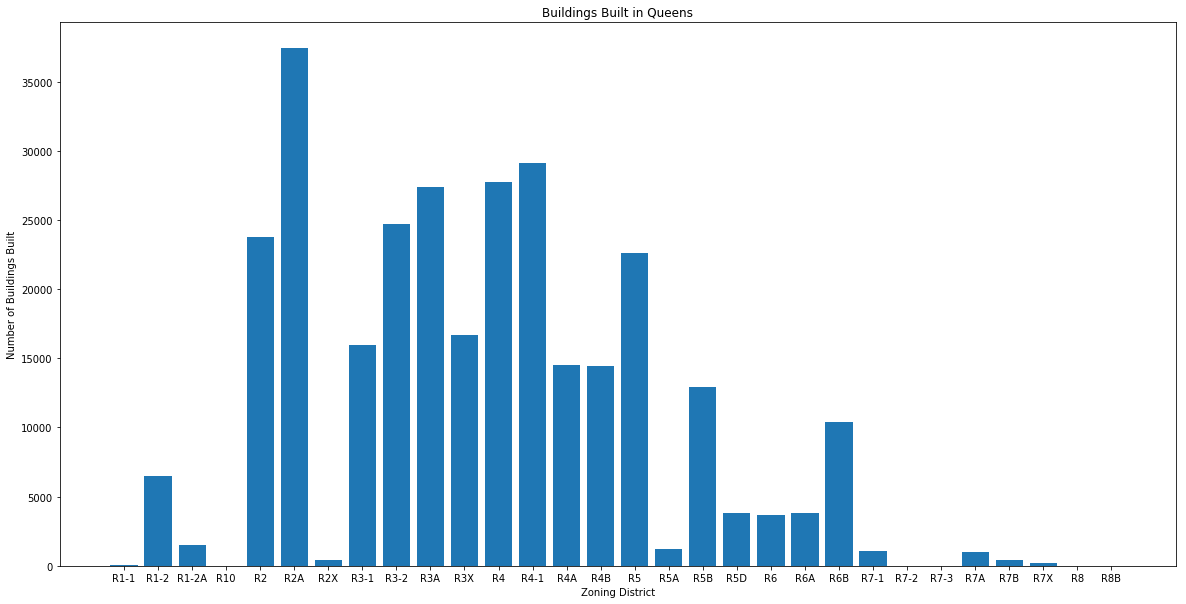

In [9]:
queensBar = queens[queens['ZoneDist1'].str[0] == 'R']
queensBar = queensBar.groupby(['ZoneDist1'], as_index=False).size()
plt.figure(figsize=(20, 10))
plt.bar(queensBar['ZoneDist1'], queensBar['size'])
plt.xlabel('Zoning District')
plt.ylabel('Number of Buildings Built')
plt.title('Buildings Built in Queens')

Text(0.5, 1.0, 'Buildings Built in Brooklyn')

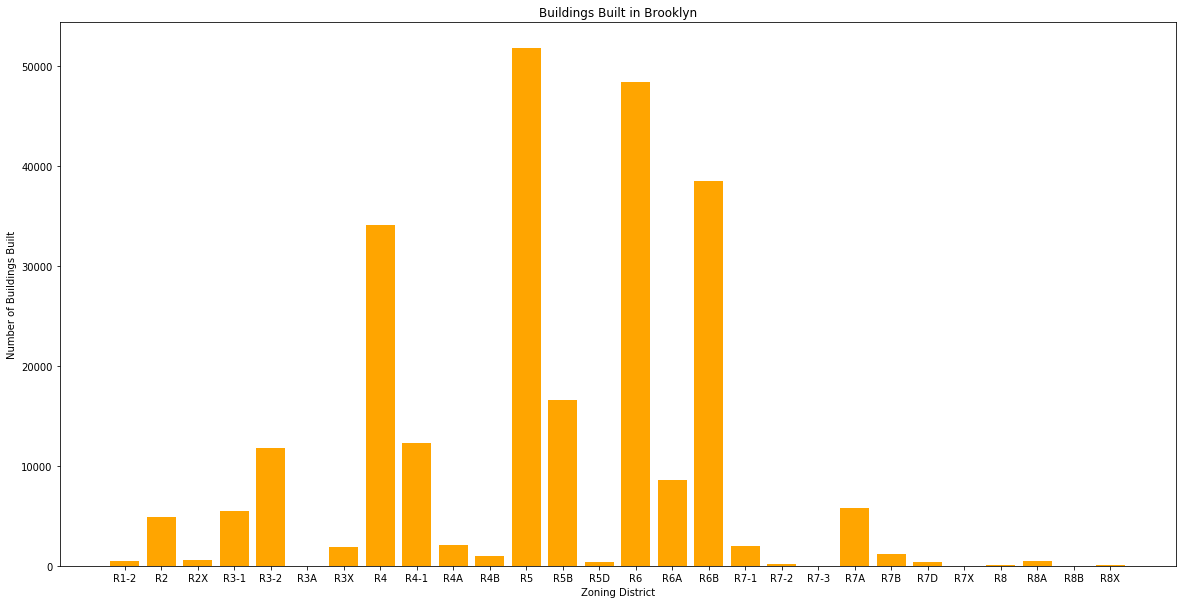

In [16]:
brookynBar = brooklyn[brooklyn['ZoneDist1'].str[0] == 'R']
brookynBar = brookynBar.groupby(['ZoneDist1'], as_index=False).size()
plt.figure(figsize=(20, 10))
plt.bar(brookynBar['ZoneDist1'], brookynBar['size'], color='orange')
plt.xlabel('Zoning District')
plt.ylabel('Number of Buildings Built')
plt.title('Buildings Built in Brooklyn')

Text(0.5, 1.0, 'Buildings Built in Bronx')

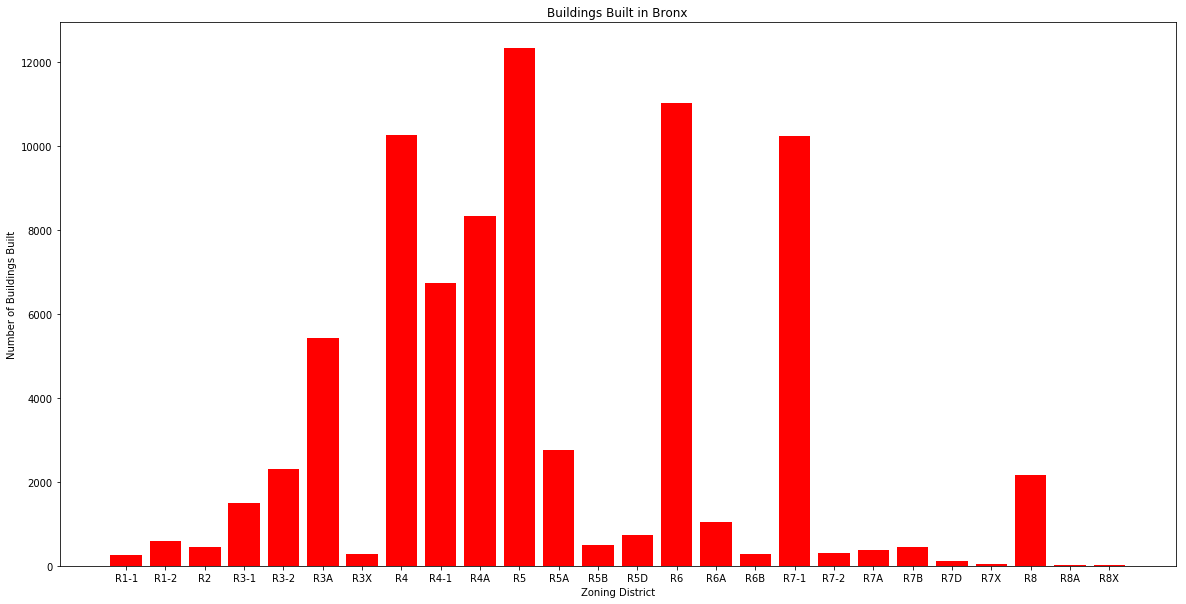

In [45]:
bronxBar = bronx[bronx['ZoneDist1'].str[0] == 'R']
bronxBar = bronxBar.groupby(['ZoneDist1'], as_index=False).size()
plt.figure(figsize=(20, 10))
plt.bar(bronxBar['ZoneDist1'], bronxBar['size'], color='red')
plt.xlabel('Zoning District')
plt.ylabel('Number of Buildings Built')
plt.title('Buildings Built in Bronx')

Text(0.5, 1.0, 'Buildings Built in Manhattan')

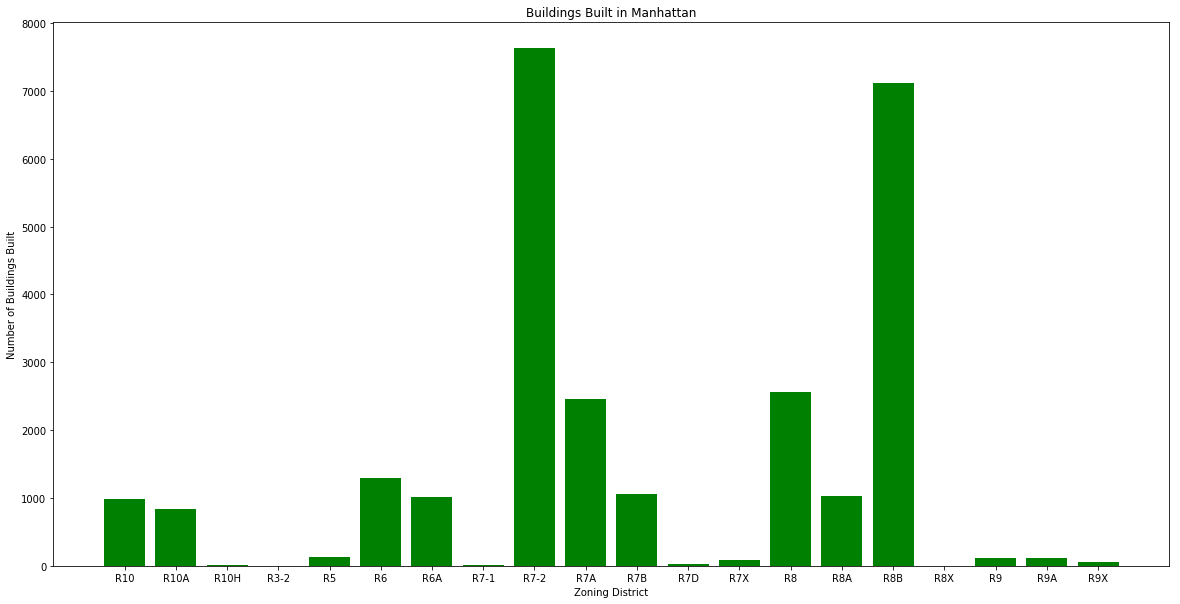

In [18]:
manhattanBar = manhattan[manhattan['ZoneDist1'].str[0] == 'R']
manhattanBar = manhattanBar.groupby(['ZoneDist1'], as_index=False).size()
plt.figure(figsize=(20, 10))
plt.bar(manhattanBar['ZoneDist1'], manhattanBar['size'], color='green')
plt.xlabel('Zoning District')
plt.ylabel('Number of Buildings Built')
plt.title('Buildings Built in Manhattan')

Text(0.5, 1.0, 'Buildings Built in Staten Island')

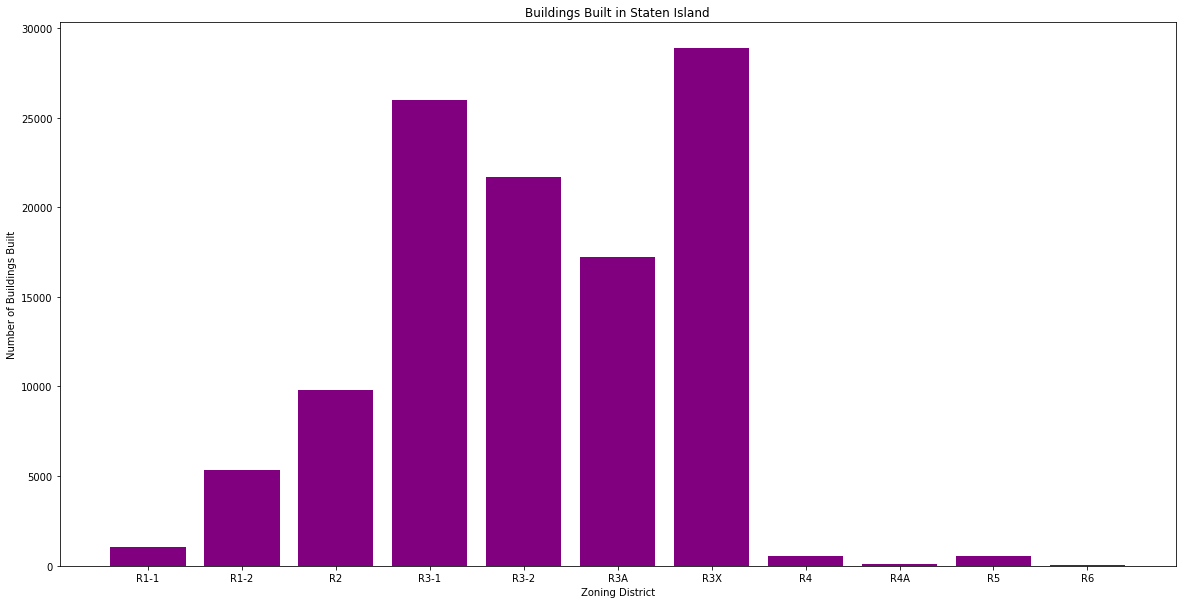

In [19]:
statenBar = staten[staten['ZoneDist1'].str[0] == 'R']
statenBar = statenBar.groupby(['ZoneDist1'], as_index=False).size()
plt.figure(figsize=(20, 10))
plt.bar(statenBar['ZoneDist1'], statenBar['size'], color='purple')
plt.xlabel('Zoning District')
plt.ylabel('Number of Buildings Built')
plt.title('Buildings Built in Staten Island')

I created a function to make the process of dealing with each excel file simpler

In [38]:
def handleSales(filename, borough, skipcount, year, handleSpecial=False):
    a = pd.read_excel(filename, skiprows=skipcount)
    if handleSpecial:
        a['SALE PRICE'] = a['SALE PRICE\n']
    a = a[a['SALE PRICE'] != 0]
    a['BOROUGH'] = borough
    a = a.groupby(['BOROUGH'])['SALE PRICE'].mean().reset_index()
    a['Year'] = year
    return a

In [49]:
a = handleSales('sales_manhattan_03.xls', 'Manhattan', 3, 2003)

b = handleSales('sales_manhattan_04.xls', 'Manhattan', 3, 2004)

c = handleSales('sales_manhattan_05.xls', 'Manhattan', 3, 2005)

d = handleSales('sales_manhattan_06.xls', 'Manhattan', 3, 2006)

e = handleSales('sales_2007_manhattan.xls', 'Manhattan', 3, 2007)

f = handleSales('sales_2008_manhattan.xls', 'Manhattan', 3, 2008)

g = handleSales('2009_manhattan.xls', 'Manhattan', 3, 2009)

h = handleSales('2010_manhattan.xls', 'Manhattan', 3, 2010)

i = handleSales('2011_manhattan.xls', 'Manhattan', 4, 2011)

j = handleSales('2012_manhattan.xls', 'Manhattan', 4, 2012, handleSpecial=True)

k = handleSales('2013_manhattan.xls', 'Manhattan', 4, 2013, handleSpecial=True) 

l = handleSales('2014_manhattan.xls', 'Manhattan', 4, 2014, handleSpecial=True)

m = handleSales('2015_manhattan.xls', 'Manhattan', 4, 2015, handleSpecial=True)

n = handleSales('2016_manhattan.xls', 'Manhattan', 4, 2016, handleSpecial=True)

o = handleSales('2017_manhattan.xls', 'Manhattan', 4, 2017, handleSpecial=True)

p = handleSales('2018_manhattan.xls', 'Manhattan', 4, 2018, handleSpecial=True)

q = handleSales('2019_manhattan.xls', 'Manhattan', 4, 2019, handleSpecial=True)

r = handleSales('2020_manhattan.xls', 'Manhattan', 6, 2020)

In [50]:
manhattansales = pd.concat([a, b, c, d, e, f, g, h, i, j, k, l, m, o, p, q, r]).reset_index()
manhattansales = manhattansales[['BOROUGH', 'Year', 'SALE PRICE']]
manhattansales.head(3)

,BOROUGH,Year,SALE PRICE
0,Manhattan,2003,1.208391e+06
1,Manhattan,2004,1.594848e+06
2,Manhattan,2005,2.069720e+06


In [47]:
manhattanbuilt = manhattan.groupby(['YearBuilt']).size().reset_index()
manhattanbuilt['NumBuilt'] = manhattanbuilt[0]
manhattanbuilt = manhattanbuilt[['YearBuilt', 'NumBuilt']]
manhattanbuiltfinal = manhattanbuilt[(manhattanbuilt['YearBuilt'] >= 2003) & (manhattanbuilt['YearBuilt'] != 2040)].reset_index()
manhattanbuiltfinal = manhattanbuiltfinal[['YearBuilt', 'NumBuilt']]
manhattanbuiltfinal.head(3)

,YearBuilt,NumBuilt
0,2003,130
1,2004,103
2,2005,144


In [39]:
a1 = handleSales('sales_bronx_03.xls', 'Bronx', 3, 2003)

b1 = handleSales('sales_bronx_04.xls', 'Bronx', 3, 2004)

c1 = handleSales('sales_bronx_05.xls', 'Bronx', 3, 2005)

d1 = handleSales('sales_bronx_06.xls', 'Bronx', 3, 2006)

e1 = handleSales('sales_2007_bronx.xls', 'Bronx', 3, 2007)

f1 = handleSales('sales_2008_bronx.xls', 'Bronx', 3, 2008)

g1 = handleSales('2009_bronx.xls', 'Bronx', 3, 2009)

h1 = handleSales('2010_bronx.xls', 'Bronx', 3, 2010)

i1 = handleSales('2011_bronx.xls', 'Bronx', 4, 2011)

j1 = handleSales('2012_bronx.xls', 'Bronx', 4, 2012, handleSpecial=True)

k1 = handleSales('2013_bronx.xls', 'Bronx', 4, 2013, handleSpecial=True) 

l1 = handleSales('2014_bronx.xls', 'Bronx', 4, 2014, handleSpecial=True)

m1 = handleSales('2015_bronx.xls', 'Bronx', 4, 2015, handleSpecial=True)

n1 = handleSales('2016_bronx.xls', 'Bronx', 4, 2016, handleSpecial=True)

o1 = handleSales('2017_bronx.xls', 'Bronx', 4, 2017, handleSpecial=True)

p1 = handleSales('2018_bronx.xls', 'Bronx', 4, 2018, handleSpecial=True)

q1 = handleSales('2019_bronx.xls', 'Bronx', 4, 2019, handleSpecial=True)

r1 = handleSales('2020_bronx.xls', 'Bronx', 6, 2020)

In [48]:
bronxsales = pd.concat([a1, b1, c1, d1, e1, f1, g1, h1, i1, j1, k1, l1, m1, o1, p1, q1, r1]).reset_index()
bronxsales = bronxsales[['BOROUGH', 'Year', 'SALE PRICE']]
bronxsales.head(3)

,BOROUGH,Year,SALE PRICE
0,Bronx,2003,350551.568390
1,Bronx,2004,434500.240241
2,Bronx,2005,502938.645216


In [82]:
bronxbuilt = bronx.groupby(['YearBuilt']).size().reset_index()
bronxbuilt['NumBuilt'] = bronxbuilt[0]
bronxbuilt = bronxbuilt[['YearBuilt', 'NumBuilt']]
bronxbuiltfinal = bronxbuilt[(bronxbuilt['YearBuilt'] >= 2003) & (bronxbuilt['YearBuilt'] != 2040)].reset_index()
bronxbuiltfinal = bronxbuiltfinal[['YearBuilt', 'NumBuilt']]

In [83]:
bronxbuiltfinal.head(3)

,YearBuilt,NumBuilt
0,2003,546
1,2004,729
2,2005,744


In [51]:
a2 = handleSales('sales_brooklyn_03.xls', 'Brooklyn', 3, 2003)

b2 = handleSales('sales_brooklyn_04.xls', 'Brooklyn', 3, 2004)

c2 = handleSales('sales_brooklyn_05.xls', 'Brooklyn', 3, 2005)

d2 = handleSales('sales_brooklyn_06.xls', 'Brooklyn', 3, 2006)

e2 = handleSales('sales_2007_brooklyn.xls', 'Brooklyn', 3, 2007)

f2 = handleSales('sales_2008_brooklyn.xls', 'Brooklyn', 3, 2008)

g2 = handleSales('2009_brooklyn.xls', 'Brooklyn', 3, 2009)

h2 = handleSales('2010_brooklyn.xls', 'Brooklyn', 3, 2010)

i2 = handleSales('2011_brooklyn.xls', 'Brooklyn', 4, 2011)

j2 = handleSales('2012_brooklyn.xls', 'Brooklyn', 4, 2012, handleSpecial=True)

k2 = handleSales('2013_brooklyn.xls', 'Brooklyn', 4, 2013, handleSpecial=True) 

l2 = handleSales('2014_brooklyn.xls', 'Brooklyn', 4, 2014, handleSpecial=True)

m2 = handleSales('2015_brooklyn.xls', 'Brooklyn', 4, 2015, handleSpecial=True)

n2 = handleSales('2016_brooklyn.xls', 'Brooklyn', 4, 2016, handleSpecial=True)

o2 = handleSales('2017_brooklyn.xls', 'Brooklyn', 4, 2017, handleSpecial=True)

p2 = handleSales('2018_brooklyn.xls', 'Brooklyn', 4, 2018, handleSpecial=True)

q2 = handleSales('2019_brooklyn.xls', 'Brooklyn', 4, 2019, handleSpecial=True)

r2 = handleSales('2020_brooklyn.xls', 'Brooklyn', 6, 2020)

In [52]:
brooklynsales = pd.concat([a2, b2, c2, d2, e2, f2, g2, h2, i2, j2, k2, l2, m2, o2, p2, q2, r2]).reset_index()
brooklynsales = brooklynsales[['BOROUGH', 'Year', 'SALE PRICE']]
brooklynsales.head(3)

,BOROUGH,Year,SALE PRICE
0,Brooklyn,2003,414655.895015
1,Brooklyn,2004,497324.194312
2,Brooklyn,2005,628156.768735


In [57]:
brooklynbuilt = brooklyn.groupby(['YearBuilt']).size().reset_index()
brooklynbuilt['NumBuilt'] = brooklynbuilt[0]
brooklynbuilt = brooklynbuilt[['YearBuilt', 'NumBuilt']]
brooklynbuiltfinal = brooklynbuilt[(brooklynbuilt['YearBuilt'] >= 2003) & (brooklynbuilt['YearBuilt'] != 2040)].reset_index()
brooklynbuiltfinal = brooklynbuiltfinal[['YearBuilt', 'NumBuilt']]

In [59]:
brooklynbuiltfinal.head(3)

,YearBuilt,NumBuilt
0,2003,1088
1,2004,1672
2,2005,1800


In [53]:
a3 = handleSales('sales_queens_03.xls', 'Queens', 3, 2003)

b3 = handleSales('sales_queens_04.xls', 'Queens', 3, 2004)

c3 = handleSales('sales_queens_05.xls', 'Queens', 3, 2005)

d3 = handleSales('sales_queens_06.xls', 'Queens', 3, 2006)

e3 = handleSales('sales_2007_queens.xls', 'Queens', 3, 2007)

f3 = handleSales('sales_2008_queens.xls', 'Queens', 3, 2008)

g3 = handleSales('2009_queens.xls', 'Queens', 3, 2009)

h3 = handleSales('2010_queens.xls', 'Queens', 3, 2010)

i3 = handleSales('2011_queens.xls', 'Queens', 4, 2011)

j3 = handleSales('2012_queens.xls', 'Queens', 4, 2012, handleSpecial=True)

k3 = handleSales('2013_queens.xls', 'Queens', 4, 2013, handleSpecial=True) 

l3 = handleSales('2014_queens.xls', 'Queens', 4, 2014, handleSpecial=True)

m3 = handleSales('2015_queens.xls', 'Queens', 4, 2015, handleSpecial=True)

n3 = handleSales('2016_queens.xls', 'Queens', 4, 2016, handleSpecial=True)

o3 = handleSales('2017_queens.xls', 'Queens', 4, 2017, handleSpecial=True)

p3 = handleSales('2018_queens.xls', 'Queens', 4, 2018, handleSpecial=True)

q3 = handleSales('2019_queens.xls', 'Queens', 4, 2019, handleSpecial=True)

r3 = handleSales('2020_queens.xls', 'Queens', 6, 2020)

In [54]:
queenssales = pd.concat([a3, b3, c3, d3, e3, f3, g3, h3, i3, j3, k3, l3, m3, o3, p3, q3, r3]).reset_index()
queenssales = queenssales[['BOROUGH', 'Year', 'SALE PRICE']]
queenssales.head(3)

,BOROUGH,Year,SALE PRICE
0,Queens,2003,354754.532756
1,Queens,2004,435140.035529
2,Queens,2005,491733.476798


In [60]:
queensbuilt = queens.groupby(['YearBuilt']).size().reset_index()
queensbuilt['NumBuilt'] = queensbuilt[0]
queensbuilt = queensbuilt[['YearBuilt', 'NumBuilt']]
queensbuiltfinal = queensbuilt[(queensbuilt['YearBuilt'] >= 2003) & (queensbuilt['YearBuilt'] != 2040)].reset_index()
queensbuiltfinal = queensbuiltfinal[['YearBuilt', 'NumBuilt']]

In [62]:
queensbuiltfinal.head(3)

,YearBuilt,NumBuilt
0,2003,1134
1,2004,2077
2,2005,2058


In [55]:
a4 = handleSales('sales_si_03.xls', 'Staten Island', 3, 2003)

b4 = handleSales('sales_si_04.xls', 'Staten Island', 3, 2004)

c4 = handleSales('sales_si_05.xls', 'Staten Island', 3, 2005)

d4 = handleSales('sales_si_06.xls', 'Staten Island', 3, 2006)

e4 = handleSales('sales_2007_statenisland.xls', 'Staten Island', 3, 2007)

f4 = handleSales('sales_2008_statenisland.xls', 'Staten Island', 3, 2008)

g4 = handleSales('2009_statenisland.xls', 'Staten Island', 3, 2009)

h4 = handleSales('2010_statenisland.xls', 'Staten Island', 3, 2010)

i4 = handleSales('2011_statenisland.xls', 'Staten Island', 4, 2011)

j4 = handleSales('2012_statenisland.xls', 'Staten Island', 4, 2012, handleSpecial=True)

k4 = handleSales('2013_statenisland.xls', 'Staten Island', 4, 2013, handleSpecial=True) 

l4 = handleSales('2014_statenisland.xls', 'Staten Island', 4, 2014, handleSpecial=True)

m4 = handleSales('2015_statenisland.xls', 'Staten Island', 4, 2015, handleSpecial=True)

n4 = handleSales('2016_statenisland.xls', 'Staten Island', 4, 2016, handleSpecial=True)

o4 = handleSales('2017_statenisland.xls', 'Staten Island', 4, 2017, handleSpecial=True)

p4 = handleSales('2018_statenisland.xls', 'Staten Island', 4, 2018, handleSpecial=True)

q4 = handleSales('2019_statenisland.xls', 'Staten Island', 4, 2019, handleSpecial=True)

r4 = handleSales('2020_staten_island.xls', 'Staten Island', 6, 2020)

In [56]:
statensales = pd.concat([a4, b4, c4, d4, e4, f4, g4, h4, i4, j4, k4, l4, m4, o4, p4, q4, r4]).reset_index()
statensales = statensales[['BOROUGH', 'Year', 'SALE PRICE']]
statensales.head(3)

,BOROUGH,Year,SALE PRICE
0,Staten Island,2003,338541.010357
1,Staten Island,2004,430017.223799
2,Staten Island,2005,443889.579725


In [63]:
statenbuilt = staten.groupby(['YearBuilt']).size().reset_index()
statenbuilt['NumBuilt'] = statenbuilt[0]
statenbuilt = statenbuilt[['YearBuilt', 'NumBuilt']]
statenbuiltfinal = statenbuilt[(statenbuilt['YearBuilt'] >= 2003) & (queensbuilt['YearBuilt'] != 2040)].reset_index()
statenbuiltfinal = statenbuiltfinal[['YearBuilt', 'NumBuilt']]

In [65]:
statenbuiltfinal.head(3)

,YearBuilt,NumBuilt
0,2003,1544
1,2004,1947
2,2005,1267


In [66]:
nycpops = pd.read_csv('new-york-city-population-by-borough-1950-2040.csv')
nycpops['Borough'] = nycpops['Borough'].str.lstrip()
nycpops = nycpops[['Borough', '2000', '2010', '2020']]
nycpops = pd.melt(nycpops, id_vars=['Borough'], value_vars=['2000', '2010', '2020'], var_name='Year', value_name='Population')

In [71]:
manhattanPops = nycpops[nycpops['Borough'] == 'Manhattan']
brooklynPops = nycpops[nycpops['Borough'] == 'Brooklyn']
bronxPops = nycpops[nycpops['Borough'] == 'Bronx']
queensPops = nycpops[nycpops['Borough'] == 'Queens']
statenPops = nycpops[nycpops['Borough'] == 'Staten Island']

In [72]:
manhattanPops

,Borough,Year,Population
3,Manhattan,2000,1537195
9,Manhattan,2010,1585873
15,Manhattan,2020,1638281


In [73]:
brooklynPops

,Borough,Year,Population
2,Brooklyn,2000,2465326
8,Brooklyn,2010,2552911
14,Brooklyn,2020,2648452


In [74]:
bronxPops

,Borough,Year,Population
1,Bronx,2000,1332650
7,Bronx,2010,1385108
13,Bronx,2020,1446788


In [75]:
queensPops

,Borough,Year,Population
4,Queens,2000,2229379
10,Queens,2010,2250002
16,Queens,2020,2330295


In [76]:
statenPops

,Borough,Year,Population
5,Staten Island,2000,443728
11,Staten Island,2010,468730
17,Staten Island,2020,487155


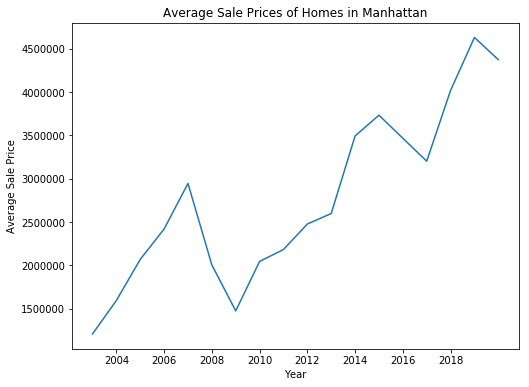

In [32]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(manhattansales['Year'], manhattansales['SALE PRICE'])
ax.set_xticks(np.arange(2004, 2020, 2))
ax.set_xlabel("Year")
ax.set_ylabel("Average Sale Price")
ax.title.set_text("Average Sale Prices of Homes in Manhattan")

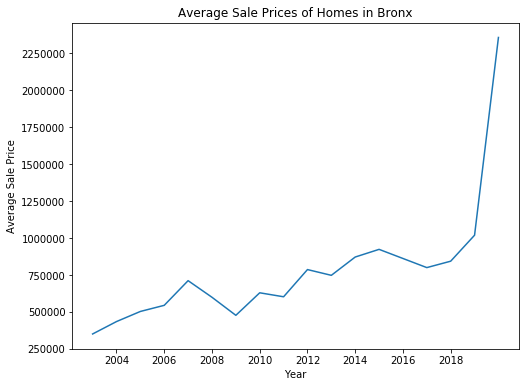

In [43]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(bronxsales['Year'], bronxsales['SALE PRICE'])
ax.set_xticks(np.arange(2004, 2020, 2))
ax.set_xlabel("Year")
ax.set_ylabel("Average Sale Price")
ax.title.set_text("Average Sale Prices of Homes in Bronx")

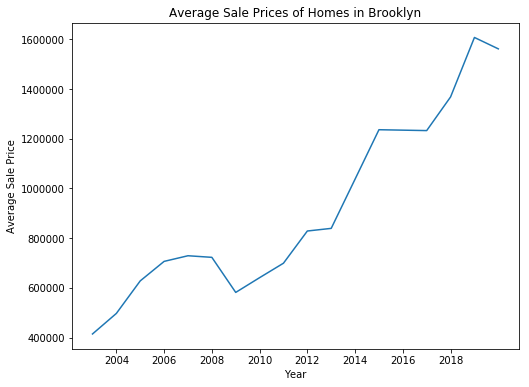

In [78]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(brooklynsales['Year'], brooklynsales['SALE PRICE'])
ax.set_xticks(np.arange(2004, 2020, 2))
ax.set_xlabel("Year")
ax.set_ylabel("Average Sale Price")
ax.title.set_text("Average Sale Prices of Homes in Brooklyn")

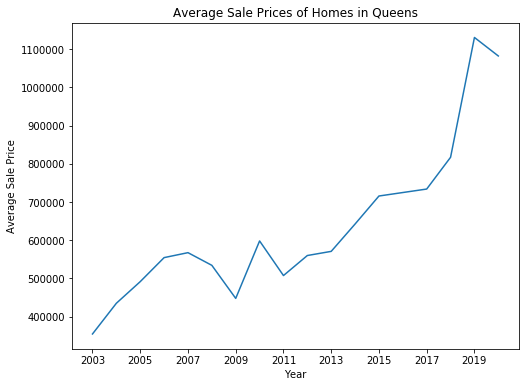

In [79]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(queenssales['Year'], queenssales['SALE PRICE'])
ax.set_xticks(np.arange(2003, 2021, 2))
ax.set_xlabel("Year")
ax.set_ylabel("Average Sale Price")
ax.title.set_text("Average Sale Prices of Homes in Queens")

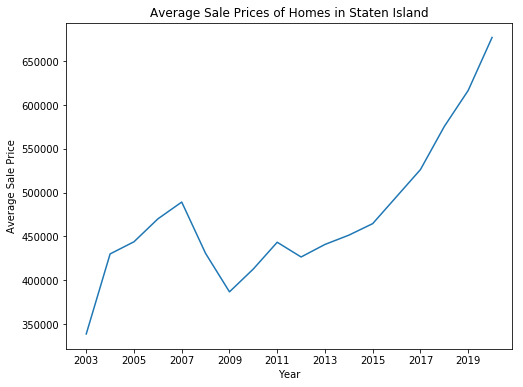

In [80]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(statensales['Year'], statensales['SALE PRICE'])
ax.set_xticks(np.arange(2003, 2021, 2))
ax.set_xlabel("Year")
ax.set_ylabel("Average Sale Price")
ax.title.set_text("Average Sale Prices of Homes in Staten Island")

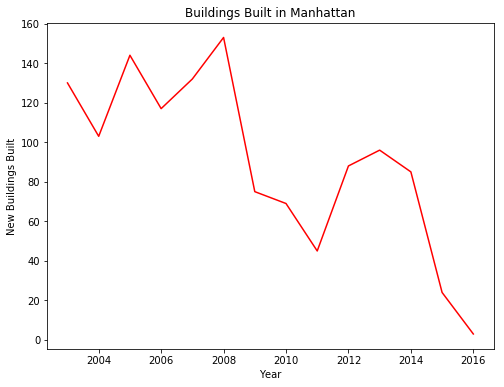

In [31]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(manhattanbuiltfinal['YearBuilt'], manhattanbuiltfinal['NumBuilt'], color='red')
ax.set_xlabel("Year")
ax.set_ylabel("New Buildings Built")
ax.title.set_text("Buildings Built in Manhattan")

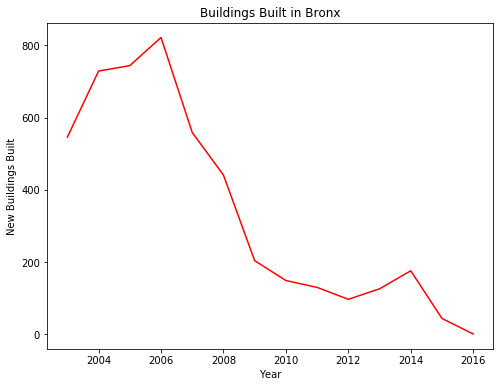

In [86]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(bronxbuiltfinal['YearBuilt'], bronxbuiltfinal['NumBuilt'], color='red')
ax.set_xlabel("Year")
ax.set_ylabel("New Buildings Built")
ax.title.set_text("Buildings Built in Bronx")

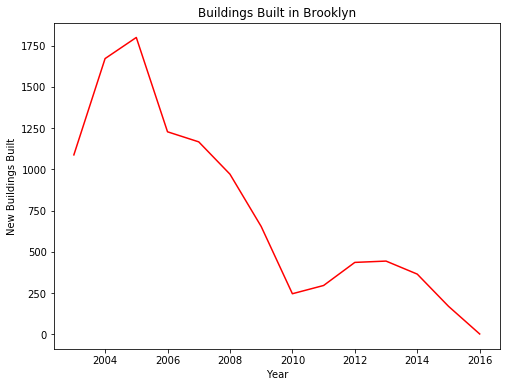

In [87]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(brooklynbuiltfinal['YearBuilt'], brooklynbuiltfinal['NumBuilt'], color='red')
ax.set_xlabel("Year")
ax.set_ylabel("New Buildings Built")
ax.title.set_text("Buildings Built in Brooklyn")

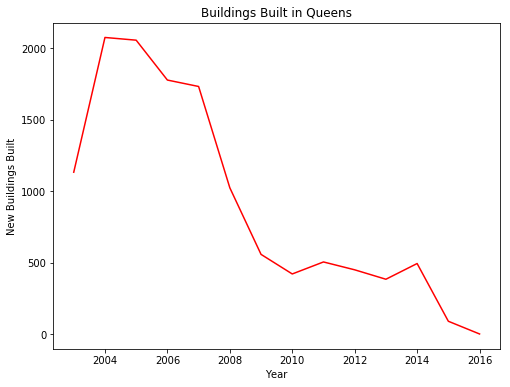

In [88]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(queensbuiltfinal['YearBuilt'], queensbuiltfinal['NumBuilt'], color='red')
ax.set_xlabel("Year")
ax.set_ylabel("New Buildings Built")
ax.title.set_text("Buildings Built in Queens")

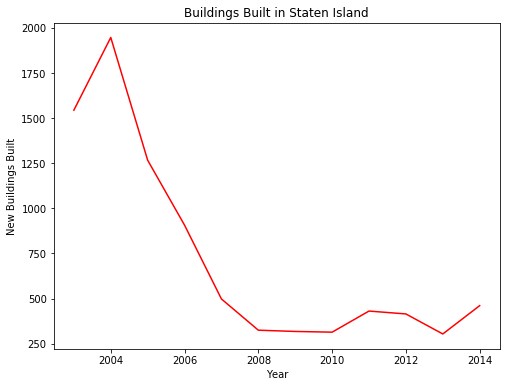

In [89]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(statenbuiltfinal['YearBuilt'], statenbuiltfinal['NumBuilt'], color='red')
ax.set_xlabel("Year")
ax.set_ylabel("New Buildings Built")
ax.title.set_text("Buildings Built in Staten Island")

Text(0.5, 1.0, 'Population in Manhattan')

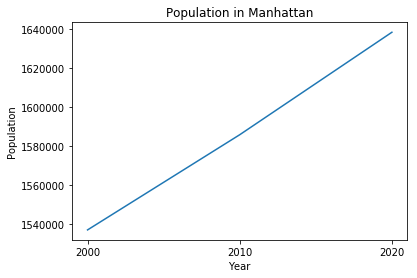

In [92]:
plt.plot(manhattanPops['Year'], manhattanPops['Population'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population in Manhattan')

Text(0.5, 1.0, 'Population in Bronx')

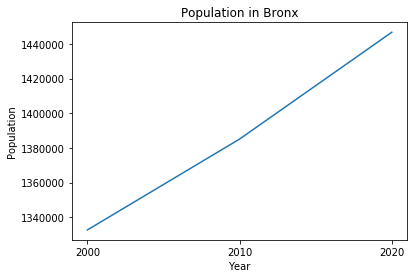

In [93]:
plt.plot(bronxPops['Year'], bronxPops['Population'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population in Bronx')

Text(0.5, 1.0, 'Population in Brooklyn')

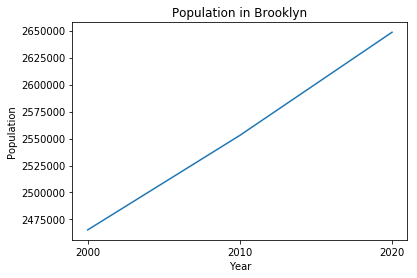

In [94]:
plt.plot(brooklynPops['Year'], brooklynPops['Population'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population in Brooklyn')

Text(0.5, 1.0, 'Population in Queens')

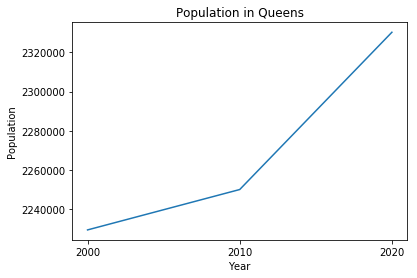

In [95]:
plt.plot(queensPops['Year'], queensPops['Population'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population in Queens')

Text(0.5, 1.0, 'Population in Staten Island')

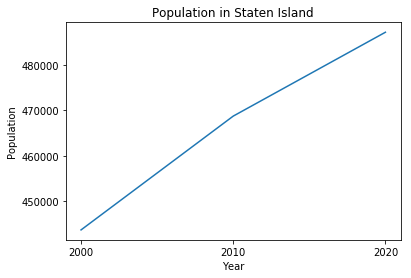

In [96]:
plt.plot(statenPops['Year'], statenPops['Population'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population in Staten Island')

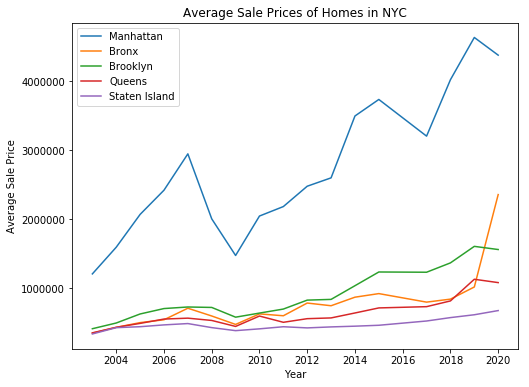

In [90]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(manhattansales['Year'], manhattansales['SALE PRICE'], label='Manhattan')
ax.plot(bronxsales['Year'], bronxsales['SALE PRICE'], label='Bronx')
ax.plot(brooklynsales['Year'], brooklynsales['SALE PRICE'], label='Brooklyn')
ax.plot(queenssales['Year'], queenssales['SALE PRICE'], label='Queens')
ax.plot(statensales['Year'], statensales['SALE PRICE'], label='Staten Island')
ax.set_xticks(np.arange(2004, 2021, 2))
ax.set_xlabel("Year")
ax.set_ylabel("Average Sale Price")
ax.title.set_text("Average Sale Prices of Homes in NYC")
ax.legend()

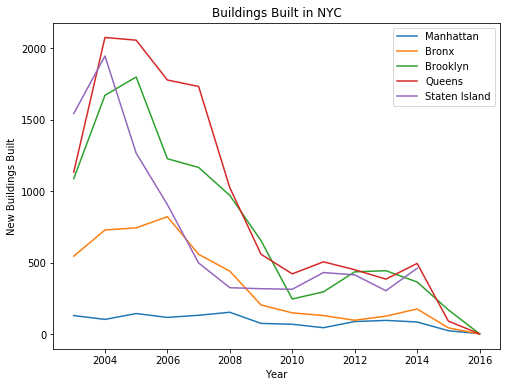

In [91]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(manhattanbuiltfinal['YearBuilt'], manhattanbuiltfinal['NumBuilt'], label='Manhattan')
ax.plot(bronxbuiltfinal['YearBuilt'], bronxbuiltfinal['NumBuilt'], label='Bronx')
ax.plot(brooklynbuiltfinal['YearBuilt'], brooklynbuiltfinal['NumBuilt'], label='Brooklyn')
ax.plot(queensbuiltfinal['YearBuilt'], queensbuiltfinal['NumBuilt'], label='Queens')
ax.plot(statenbuiltfinal['YearBuilt'], statenbuiltfinal['NumBuilt'], label='Staten Island')
ax.set_xlabel("Year")
ax.set_ylabel("New Buildings Built")
ax.title.set_text("Buildings Built in NYC")
ax.legend()

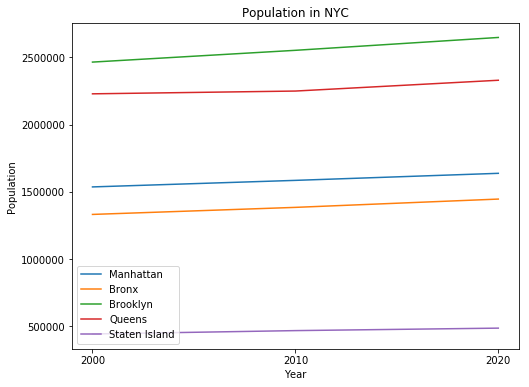

In [100]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(manhattanPops['Year'], manhattanPops['Population'], label='Manhattan')
ax.plot(bronxPops['Year'], bronxPops['Population'], label='Bronx')
ax.plot(brooklynPops['Year'], brooklynPops['Population'], label='Brooklyn')
ax.plot(queensPops['Year'], queensPops['Population'], label='Queens')
ax.plot(statenPops['Year'], statenPops['Population'], label='Staten Island')
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.title.set_text('Population in NYC')
ax.legend()